# Business Understanding

## Mall-Customer-Segmentation

Comprehending customer behavior is essential for businesses aiming to enhance their marketing strategies. In this project, I employed clustering methods to categorize customers according to their demographics and shopping preferences. The acquired insights will assist mall management in crafting tailored promotions, enhancing customer loyalty, and optimizing resource allocation.

1- What is the relationship between Annual Income and Spending Score? 

2- Which cluster is the largest in the dataset?

3- How is gender distributed across each cluster?

In [432]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


## Data Understanding

### Gather

Verify the data extraction from the Excel spreadsheet and conduct data exploration comprehensively

In [433]:
Mall_Customer_Segmentation = pd.read_csv("Data Scientest Nanoodegree\Project 1\Mall-Customer-Segmentation.csv")

In [434]:
num_rows_Mall_Customer_Segmentation = Mall_Customer_Segmentation.shape[0]
num_columns_Mall_Customer_Segmentation = Mall_Customer_Segmentation.shape[1]
print('There are {} rows and {} Columns'.format(num_rows_Mall_Customer_Segmentation,num_columns_Mall_Customer_Segmentation))

There are 200 rows and 5 Columns


In [435]:
Mall_Customer_Segmentation.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [436]:
Mall_Customer_Segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [437]:
def get_gender_data(Mall_Customer_Segmentation):
    """
    Extracts gender information from a dataset.

    Parameters:
    Mall_Customer_Segmentation (pandas.DataFrame): The dataset containing customer information.

    Returns:
    pandas.Series: A Pandas Series containing gender information if 'Gender' column exists in the dataset.
                   Returns None and prints a message if 'Gender' column is not found.
    """
    if 'Gender' in Mall_Customer_Segmentation.columns:
        gender_data = Mall_Customer_Segmentation['Gender']
        return gender_data
    else:
        print("Gender information not found in the dataset.")
        return None

In [438]:
gender_data = get_gender_data(Mall_Customer_Segmentation)

In [439]:
# values checking
Mall_Customer_Segmentation.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preparation

In [440]:
# Checking for any Missing Values

missing_val =Mall_Customer_Segmentation.isnull().sum(axis=0).reset_index()
missing_val.columns = ['Column', 'Total Missing Values']
missing_val['Filling %']=(Mall_Customer_Segmentation.shape[0]-missing_val['Total Missing Values'])/Mall_Customer_Segmentation.shape[0]*100

#This sorts the DataFrame based on the 'Filling Factor (%)' column in ascending order
missing_val.sort_values('Filling %').reset_index(drop = True)


,Column,Total Missing Values,Filling %
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


Since there is no missing values in our dataset 
Assuming 'Age' is the column with missing values by imputing the missing values with the mean age.

In [441]:
mean_age = Mall_Customer_Segmentation['Age'].mean()
Mall_Customer_Segmentation['Age'].fillna(mean_age, inplace=True)
Mall_Customer_Segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [442]:
la= LabelEncoder()

In [443]:
# Data type tran. whitout creating a new column
Mall_Customer_Segmentation.Gender=la.fit_transform(Mall_Customer_Segmentation.Gender)
Mall_Customer_Segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


The Gender column was converted into numeric values (Female = 0, Male = 1) using LabelEncoder, ensuring compatibility with clustering algorithms.

 ## Data Modeling

K-Means Clustering Method is used due to simplicity, efficiency, scalability, and interpretability, making it a versatile choice for various datasets and real-time clustering needs.

In [444]:
clusters_num=[]
j=[]

In [445]:
#i is clusters num
for i in range(1,12):
    model=KMeans(n_clusters=i)   
    model.fit(Mall_Customer_Segmentation)
    clusters_num.append(i)
    j.append(model.inertia_)

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://nu

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [446]:
pd.DataFrame(clusters_num,j)

,0
975512.060000,1
387065.713771,2
271396.562966,3
195401.198560,4
157215.866975,5
122601.937467,6
103208.943218,7
86053.674448,8
77010.159058,9
69220.571402,10


Text(0, 0.5, 'Errors')

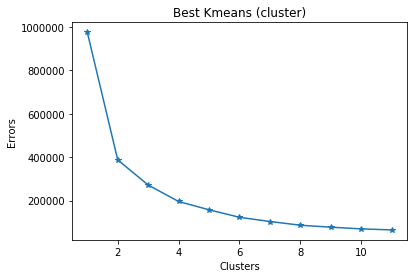

In [447]:
#Elbow Method
plt.plot(clusters_num,j,marker='*')
plt.title('Best Kmeans (cluster)')
plt.xlabel('Clusters')
plt.ylabel('Errors')

By applying the Elbow Method, I generated a plot illustrating the Within-Cluster Sum of Squares (WCSS)=j across i values spanning from 1 to 12. The graph displayed a distinct "elbow" point at i = 5, suggesting the ideal number of clusters for the dataset.

In [448]:
# taking i = 5
model=KMeans(n_clusters=5)

# fitting the input data
model.fit(Mall_Customer_Segmentation)
pre=model.predict(Mall_Customer_Segmentation)

C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rnoos\Anaconda3\lib\site-packages\sklearn\metrics\pairw

Setting i = 5, a K-Means model with 5 clusters is created, fitted to the Mall_Customer_Segmentation dataset, and used to generate predictions based on the input data.

In [449]:
Mall_Customer_Segmentation['K_M']=pre #KMean
Mall_Customer_Segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_M
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,3
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,4
196,197,0,45,126,28,2
197,198,1,32,126,74,4
198,199,1,32,137,18,2


In [450]:
df1=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==0]
df2=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==1]
df3=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==2]
df4=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==3]
df5=Mall_Customer_Segmentation[Mall_Customer_Segmentation['K_M']==4]

Separate the Mall_Customer_Segmentation dataset into five distinct dataframes (df1 to df5) based on the values in the 'K_M' column. Each dataframe (df1 to df5) contains rows where the 'K_M' column has the corresponding value (0 to 4), effectively splitting the data into subsets based on these specific values.

## Evaluate the Results

### Analyze

### 1. What is the relationship between Annual Income and Spending Score?

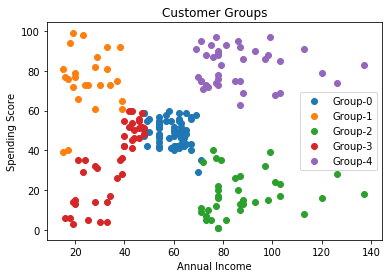

In [451]:
# scatterplot of the clusters
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group-0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group-1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group-2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group-3')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],label='Group-4')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()

The clustering analysis provides us with a very clear insight into the different customer segments at the mall.

It is evident that there are five customer segments: Group 1, Group 2, Group 3, Group 4, and Group 5 based on their annual income and spending score, which are said to be the best factors/features for determining customer segments at the mall.

### 2. Which cluster is the largest in the dataset?

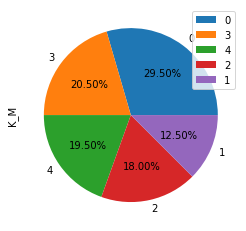

In [452]:
Mall_Customer_Segmentation['K_M'].value_counts().plot.pie(autopct='%0.2f%%') #cluster 3 is the biggest one with 32.5%

plt.legend()

Identifying the largest cluster is pivotal in customer segmentation analysis as it directs strategic focus towards the predominant customer group for tailored marketing and operational optimization.

### 3. How is gender distributed across each cluster?

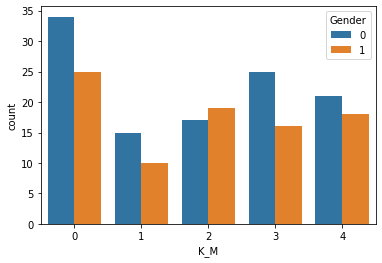

In [453]:
sns.countplot(Mall_Customer_Segmentation.K_M,hue=Mall_Customer_Segmentation.Gender)

### More Evaluation 
### Spending Score per each cluster

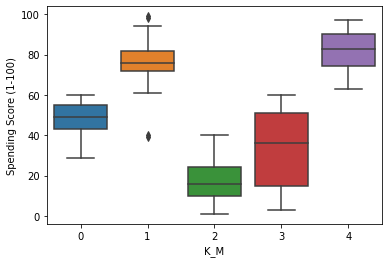

In [457]:
sns.boxplot(Mall_Customer_Segmentation['K_M'], Mall_Customer_Segmentation['Spending Score (1-100)'])

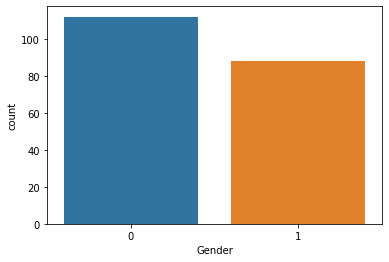

In [458]:
sns.countplot(data=Mall_Customer_Segmentation, x='Gender')

There are more women than men in this dataset.

## Age distribution

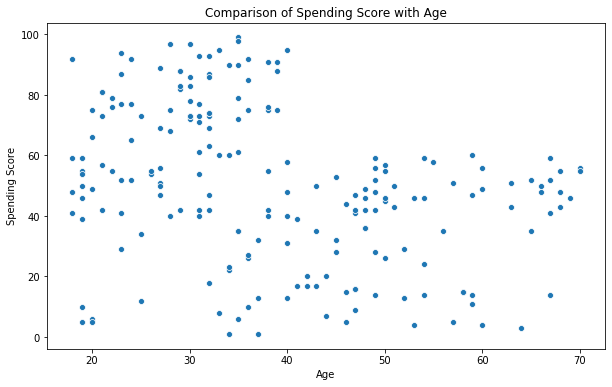

In [459]:
# Create a scatter plot to compare 'Age' and 'Spending Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=Mall_Customer_Segmentation)
plt.title('Comparison of Spending Score with Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.